# Simple Linear Regression
Step 1: Import DataSet

In [1]:

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
#ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category =FutureWarning)
# full_data.info()
# full_data.describe()
# # x = full_data.drop('tip',axis=1)

In [3]:
full_data = pd.read_csv('/content/tsk_1data.csv')

In [4]:
full_data.shape


(244, 7)

In [5]:
full_data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


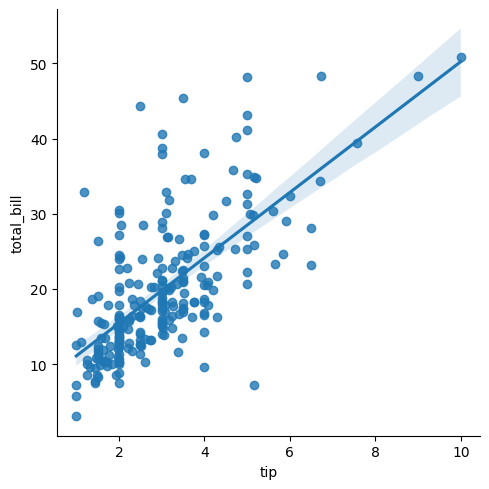

In [8]:
sns.lmplot(x="tip", y="total_bill", data=full_data)
plt.show()


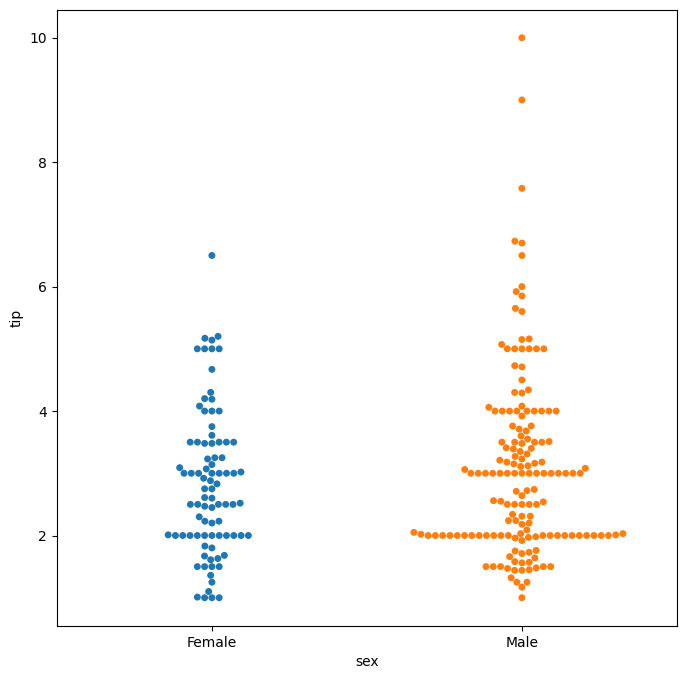

In [9]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="sex", y="tip",hue='sex', data=full_data)
plt.show()

# Data set is clean no need to perform EDA
Step 2: Splitting Dataset into Training data and Testing data

In [10]:
x = full_data[['total_bill']]
y= full_data['tip']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= .10, random_state= 101)

# Step 3 : Fit Linear Regression model
# Testing the model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(25,)
[2.28544641 2.77842389 2.41054607 3.50039735 3.61913601 2.03524709
 6.01723288 2.53458557 1.66206845 1.77868678 3.1113162  2.74449856
 1.79564944 2.32573275 2.48475774 2.49005857 2.67664789 3.46647202
 2.15186542 2.68830973 2.45507307 3.96475032 4.37397464 2.31301075
 4.3813958 ]


# Step 4 : Plotting

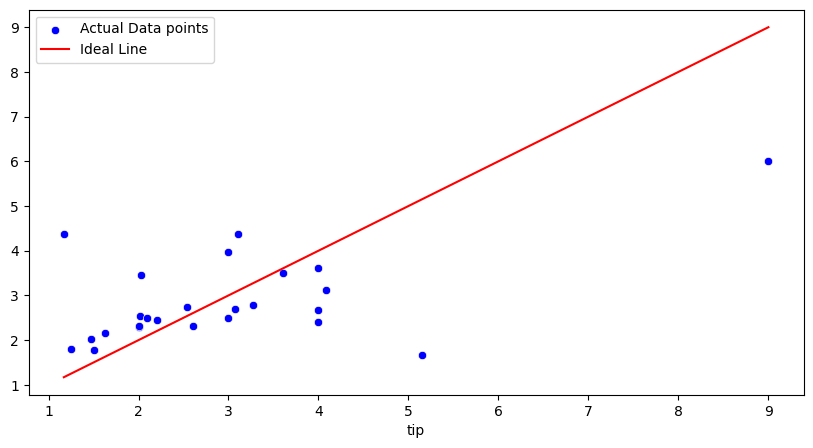

In [12]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

results = np.column_stack((y_test, y_pred))

# Step 5: Prediction of unknown values

In [13]:
# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")


Actual Values  |  Predicted Values
-----------------------------
          2.00 |          2.29
          3.27 |          2.78
          4.00 |          2.41
          3.61 |          3.50
          4.00 |          3.62
          1.47 |          2.04
          9.00 |          6.02
          2.02 |          2.53
          5.15 |          1.66
          1.50 |          1.78
          4.08 |          3.11
          2.54 |          2.74
          1.25 |          1.80
          2.00 |          2.33
          2.09 |          2.48
          3.00 |          2.49
          4.00 |          2.68
          2.03 |          3.47
          1.63 |          2.15
          3.07 |          2.69
          2.20 |          2.46
          3.00 |          3.96
          1.17 |          4.37
          2.61 |          2.31
          3.11 |          4.38


In [14]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 1.7491850089749281
Root Mean Squared Error: 1.3225675820066543
